In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [4]:
df.dropna( inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15050 entries, 5 to 29998
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  15050 non-null  object 
 1   Name                         15050 non-null  object 
 2   Gender                       15050 non-null  object 
 3   Age                          15050 non-null  int64  
 4   Income (USD)                 15050 non-null  float64
 5   Income Stability             15050 non-null  object 
 6   Profession                   15050 non-null  object 
 7   Type of Employment           15050 non-null  object 
 8   Location                     15050 non-null  object 
 9   Loan Amount Request (USD)    15050 non-null  float64
 10  Current Loan Expenses (USD)  15050 non-null  float64
 11  Expense Type 1               15050 non-null  object 
 12  Expense Type 2               15050 non-null  object 
 13  Dependents           

# Encodeing

In [8]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
for i in df.select_dtypes(['object']).columns:
    df[i] = labelEncoder.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15050 entries, 5 to 29998
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  15050 non-null  int64  
 1   Name                         15050 non-null  int64  
 2   Gender                       15050 non-null  int64  
 3   Age                          15050 non-null  int64  
 4   Income (USD)                 15050 non-null  float64
 5   Income Stability             15050 non-null  int64  
 6   Profession                   15050 non-null  int64  
 7   Type of Employment           15050 non-null  int64  
 8   Location                     15050 non-null  int64  
 9   Loan Amount Request (USD)    15050 non-null  float64
 10  Current Loan Expenses (USD)  15050 non-null  float64
 11  Expense Type 1               15050 non-null  int64  
 12  Expense Type 2               15050 non-null  int64  
 13  Dependents           

# Split Data

In [55]:
X = df.drop(columns=['Loan Sanction Amount (USD)'])
y = df['Loan Sanction Amount (USD)']
print("X Size: ", X.shape)
print("y Size: ", y.shape)

X Size:  (15050, 23)
y Size:  (15050,)


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
print("X_train Size: ", X_train.shape)
print("X_test Size: ", X_test.shape)
print("y_train Size: ", y_train.shape)
print("y_test Size: ", y_test.shape)

X_train Size:  (10535, 23)
X_test Size:  (4515, 23)
y_train Size:  (10535,)
y_test Size:  (4515,)


# Feature Selection

In [19]:
from sklearn.feature_selection import SelectKBest, f_regression

kbest = SelectKBest(score_func=f_regression ,k=4).fit(X, y)

mask = kbest.get_support()
selected_features = X.columns[mask]

print("Selected columns:", selected_features)

Selected columns: Index(['Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Credit Score', 'Property Price'],
      dtype='object')


# Model

In [22]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()
MyModel = linearRegression.fit(X_train, y_train)
MyModel

LinearRegression()

# Report

In [24]:
accuracy = MyModel.score(X_test, y_test)
print("Linear Regression Accuracy: ", accuracy)

Linear Regression Accuracy:  0.559287352612365


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = MyModel.predict(X_test)

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R^2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  22492.92954591322
Mean Squared Error:  973379470.8815241
R^2 Score:  0.559287352612365


# Cross-Validation

Mean Squared Error (MSE): 947300348.6109567
Mean Absolute Error (MAE): 22232.91530599805
R-squared (R²) Score: [0.56318701 0.56161509 0.59322917 0.56323535 0.59381952]


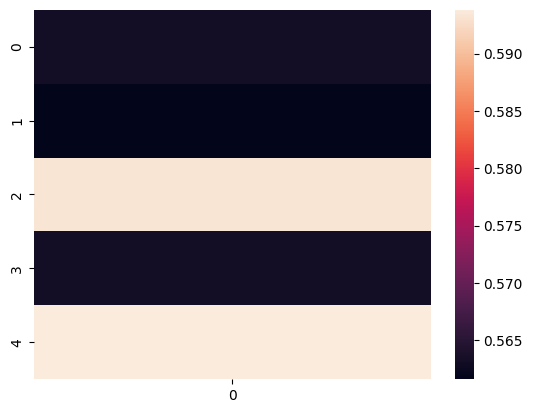

In [43]:
from sklearn.calibration import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def CrossValidation(model, X, y):
    cv_results = cross_validate(model, X, y, cv=5)

    cv_y_pred = cross_val_predict(model, X, y, cv=5)

    mse_scores = mean_squared_error(y, cv_y_pred)
    mae_scores = mean_absolute_error(y, cv_y_pred)
    r2_scores = cv_results['test_score']

    print("Mean Squared Error (MSE):", mse_scores)
    print("Mean Absolute Error (MAE):", mae_scores)
    print("R-squared (R²) Score:", r2_scores)

    sns.heatmap(np.reshape(r2_scores, (-1, 1)))
    
CrossValidation(linearRegression, X, y)


# Confusion Matrix

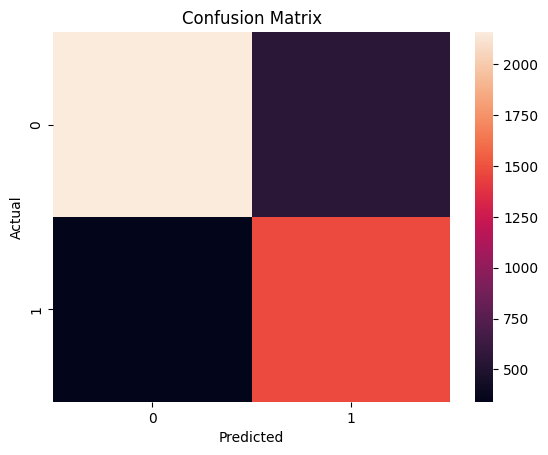

In [40]:
from sklearn.metrics import confusion_matrix

def ConfusionMatrix(model, X_train, X_test, y_train, y_test):
    trained_model = model.fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)

    threshold = y_test.mean()
    y_test_class = (y_test > threshold).astype(int)
    y_pred_class = (y_pred > threshold).astype(int)

    cm = confusion_matrix(y_test_class, y_pred_class)
    sns.heatmap(cm)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

ConfusionMatrix(linearRegression, X_train, X_test, y_train, y_test)

# Principal Component Analysis (PCA) is a dimensionality reduction technique

Accuracy: 0.4017172674315336
Mean Absolute Error:  27724.63073083507
Mean Squared Error:  1321396454.3949802
R^2 Score:  0.4017172674315336


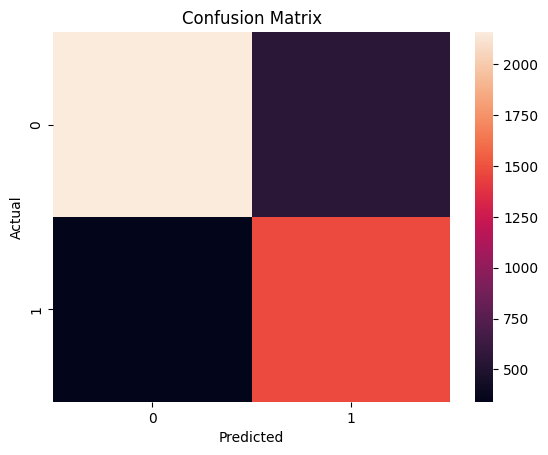

In [42]:
from sklearn.decomposition import PCA

def ModelUsingPCA(model, X_train, X_test, y_train, y_test):
    pca = PCA(n_components=2)
    
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    model.fit(X_train_pca, y_train)
    
    y_pred = model.predict(X_test_pca)
    
    accuracy = model.score(X_test_pca, y_test)
    print("Accuracy:", accuracy)
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("R^2 Score: ", r2_score(y_test, y_pred))
    ConfusionMatrix(model, X_train, X_test, y_train, y_test)
    
ModelUsingPCA(linearRegression,X_train, X_test, y_train, y_test)

# ROC Curve

In [61]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve


def ROCCurve(model, X_train, X_test, y_train, y_test):
    trained_model = model.fit(X_train, y_train)
    if hasattr(trained_model, "predict_proba"):
        y_scores = trained_model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_scores[:, 1])  # Assuming binary classification, use scores of positive class
        fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])
        plt.figure()
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.plot(fpr, tpr, label='ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()
        print(f'ROC AUC score: {roc_auc}')
    else:
        raise AttributeError("The model doesn't have a predict_proba method.")

# Call ROCCurve function with Logistic Regression model
ROCCurve(LogisticRegression(), X_train, X_test, y_train, y_test)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.